### TASK_2 
### SHREEYA SANTHANAM
### HEAD COORDINATOR : ASHISH KUMAR 

#### Importing all the necessary libraries


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


#### Defining dataset path and visualising the data

In [2]:
dataset = pd.read_csv('Documents/Cureya_datasets/task2.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.shape

(303, 14)

#### Cleaning the dataset for better visualisation and evaluation


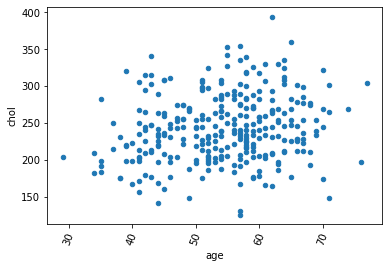

In [5]:

df_removed_outliers = dataset[dataset.chol<400]
df_removed_outliers.plot(kind='scatter', x='age' , y='chol' , rot = 70)
plt.show()

In [6]:
dataset=dataset.drop_duplicates()
print(dataset)
dataset.shape

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

(302, 14)

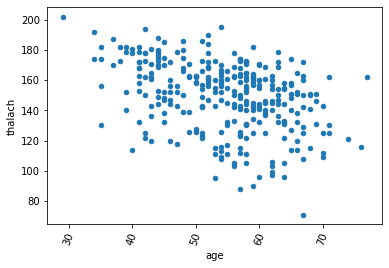

In [7]:
dataset.plot(kind='scatter' , x='age' , y='thalach' , rot = 70)
plt.show()

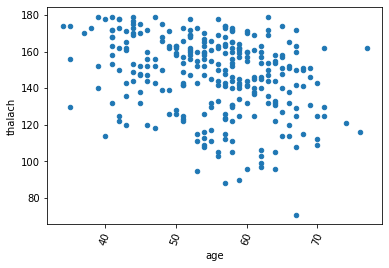

In [8]:
df_removed_outliers = dataset[dataset.thalach<180]
df_removed_outliers.plot(kind='scatter', x='age' , y='thalach' , rot = 70)
plt.show()

#### Visualising the datasets


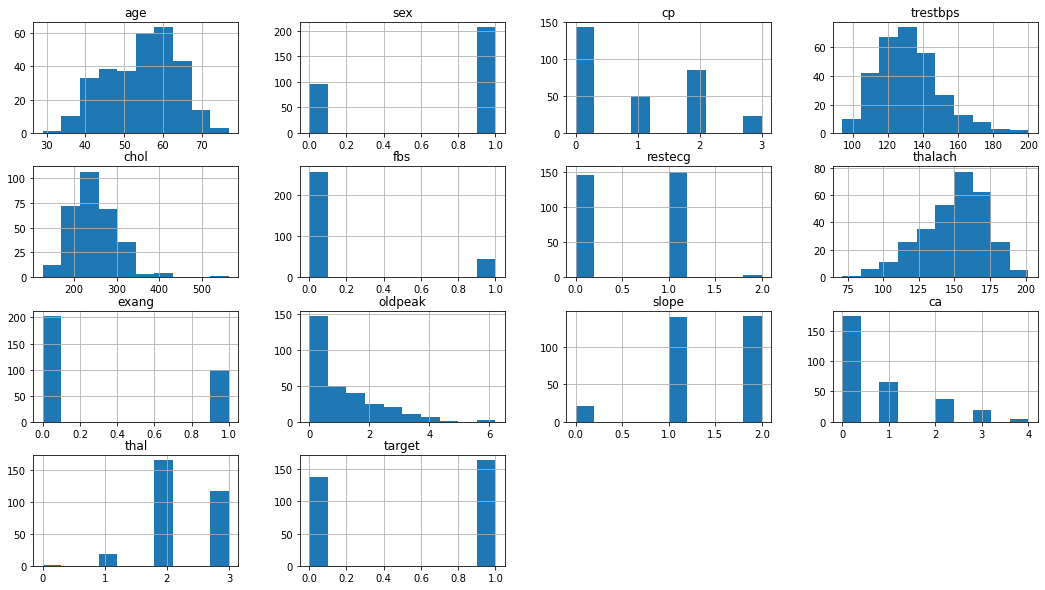

In [9]:
dataset.hist(figsize=(18,10))
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


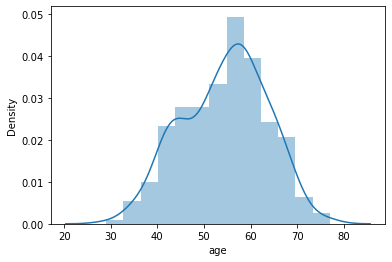

In [10]:
sns.distplot(dataset['age']);

In [11]:
dataset["trestbps"].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


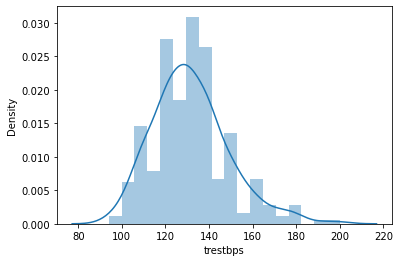

In [12]:
sns.distplot(dataset['trestbps']);

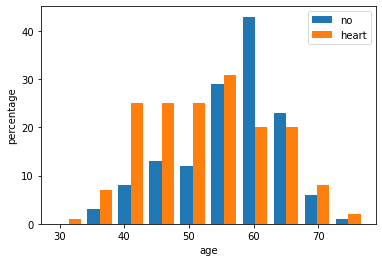

In [13]:
plt.hist([dataset[dataset.target==0].age, dataset[dataset.target==1].age], label = ["no","heart"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

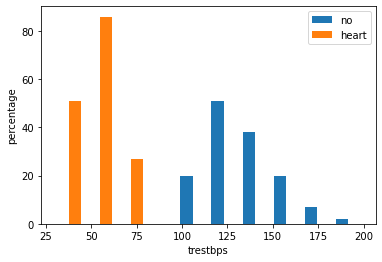

In [14]:
plt.hist([dataset[dataset.target==0].trestbps, dataset[dataset.target==1].age], label = ["no","heart"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

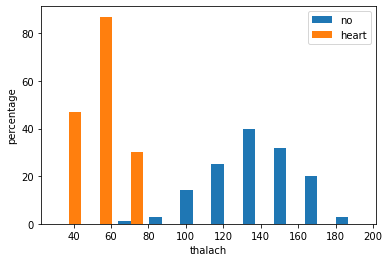

In [15]:
plt.hist([dataset[dataset.target==0].thalach, dataset[dataset.target==1].age], label = ["no","heart"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

#### Training the model using different algorithms and then comparing them

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [38]:
X = dataset[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

#### KNN

In [28]:
#classification using knn
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test, y_test))

0.7883817427385892
0.5901639344262295


In [19]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

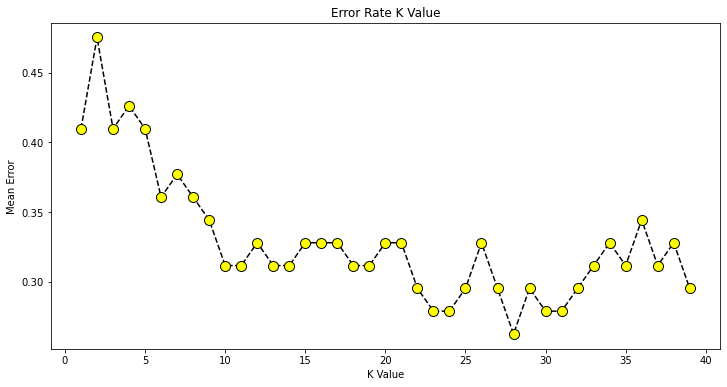

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Confusion Matrix is : 
 [[12 15]
 [10 24]]


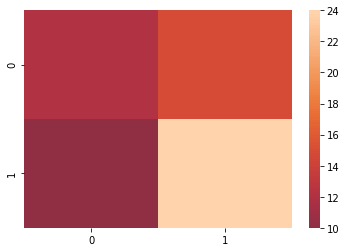

In [21]:
y_pred = model.predict(X_test)
#CONFUSION MATRIX FOR KNN MODEL
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

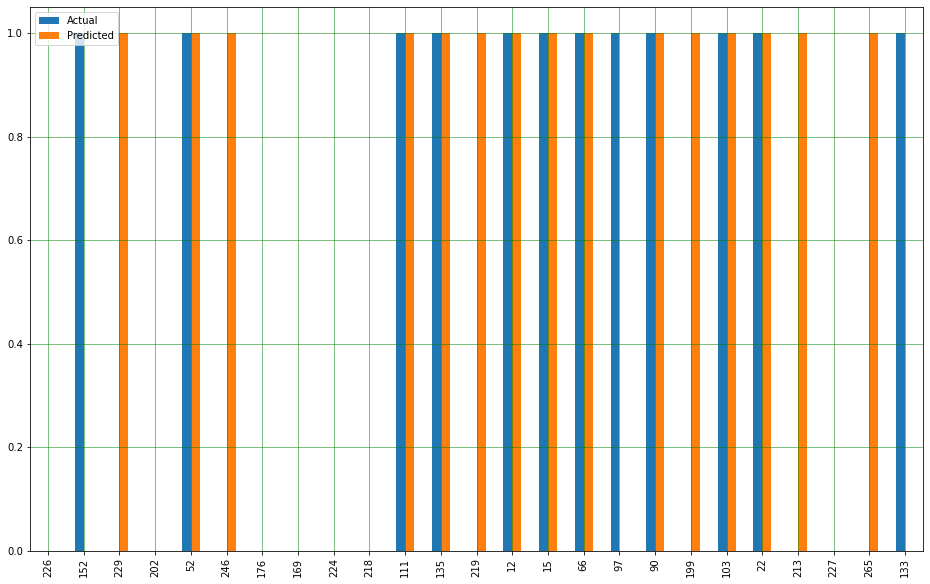

In [62]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

### Decision Tree


In [40]:
#classification using decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.8547717842323651
0.7704918032786885


Confusion Matrix is : 
 [[17 10]
 [ 4 30]]


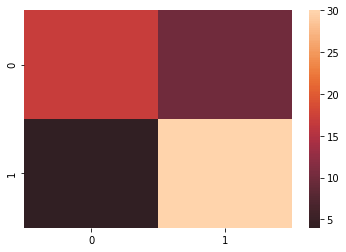

In [41]:
y_pred1 = clf.predict(X_test)
#CONFUSION MATRIX FOR DECISION TREE CLASSIFIER
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

No handles with labels found to put in legend.


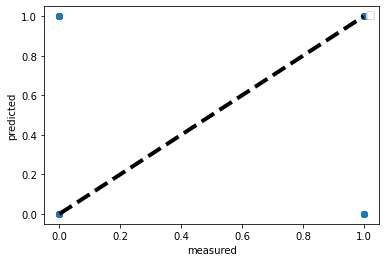

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred1)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel("measured")
ax.set_ylabel("predicted")
ax.legend()


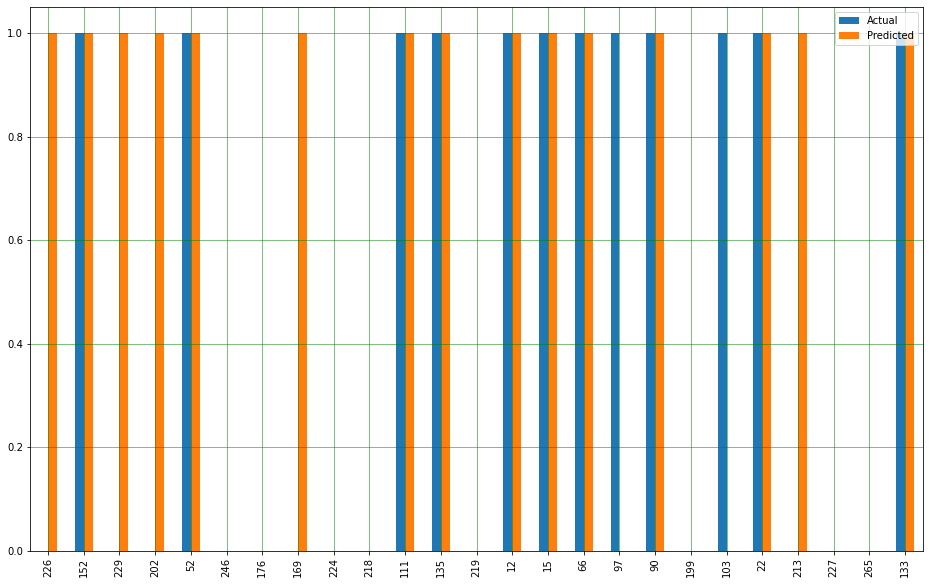

In [58]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

#### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
mod = gnb.fit(X_train, y_train)
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))

0.8257261410788381
0.9016393442622951


In [25]:
y_pred2 = mod.predict(X_test)

Confusion Matrix is : 
 [[24  3]
 [ 3 31]]


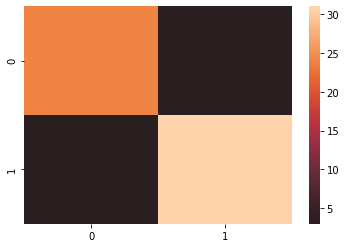

In [26]:
#CONFUSION MATRIX FOR NAIVE BAYES
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

No handles with labels found to put in legend.


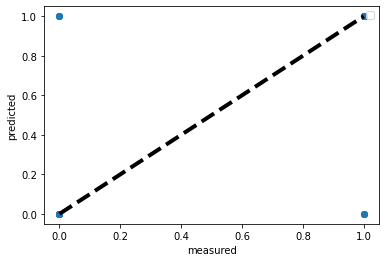

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred2)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel("measured")
ax.set_ylabel("predicted")
ax.legend()

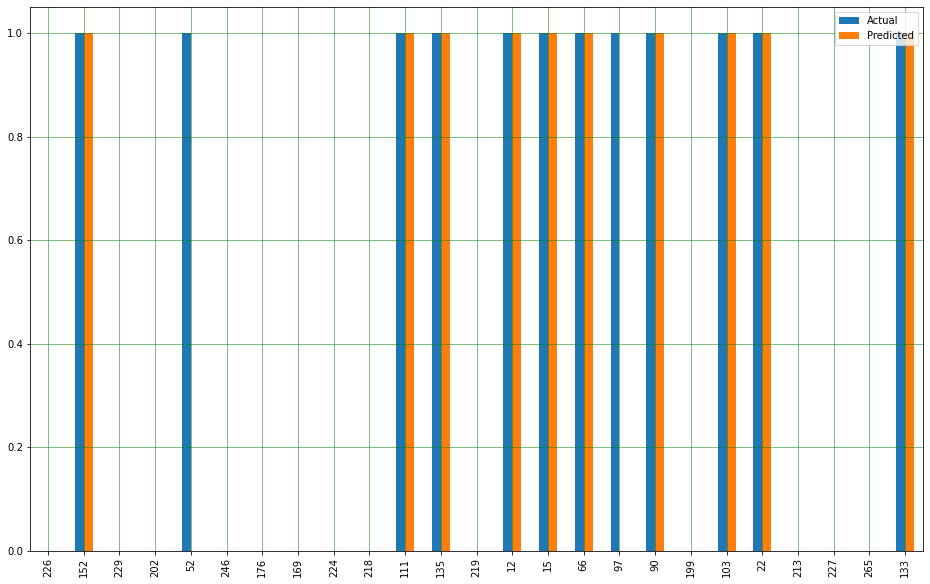

In [61]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()